In [1]:
#generador de numeros pseudo-aleatoreos

from datetime import datetime, date, time, timedelta
import pylab as plt
import calendar
import numpy as np
import math
from scipy import stats

def val(xo,m,a,c,M):
    u=0
    dat_aux=[]
    dato=[]
    x=[]
    us=0
    n = 0
    xn = xo
    
    while(n<m):
        xn = num(a,c,M,n,xn)
        x.append(float(xn))
        us=(float(xn)/M)
        dato.append(us)
        n+=1
    return dato;

def num(a,c,M,n,xn):
    xn = str(((a*int(xn))+c)%M)
    return xn 


In [2]:
#Kolmogorov - Smirnov

def colmo(n,u,x):
    
    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    
    x1 = np.arange(1/n,1+1/n,1/n)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))
    
    De=np.absolute(y2-y1)
    #print("De = ",np.max(De))

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[np.argmax(De)],x1[np.argmax(De)]]
    y3 = [np.min([y1[np.argmax(De)],y2[np.argmax(De)]]),np.max([y1[np.argmax(De)],y2[np.argmax(De)]])]
    plt.step(x3,y3,label='D')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)

    plt.show()
    
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue)

In [3]:
#ei
def esperada(n,k):
    u=[n/k]*k
    return (u)

#oi
def observada(x,k):
    frecuencia=[0]*k
    for dat in x:
        n=k-1
        while((dat*k)<n):
            n-=1
        frecuencia[n]+=1
    return(frecuencia)

In [4]:
# chi^2

def chi(n,x):
    x2=0
    k=10
    oi=observada(x,k)
    ei=esperada(n,k)
    y=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for con in range(k):
        x2=x2+(((float(oi[con])-float(ei[con]))**2)/float(ei[con]))
    print('Valor de chi cuadrado (X^2) ', x2)
    print('Frecuencia Observada ',oi)
    plt.hist(x,k,(0,1))
    plt.plot(y,ei)
    plt.show()


In [5]:
#Test de rachas

def rachas(x,k):
    aux=0
    rach=0
    cont_rac=1
    num_rach=[1]
    frecuencia=[0]*k
    for dat in x:
        n=k-1
        while((dat*k)<n):
            n-=1
        if(aux!=n):
            cont_rac+=1
        aux=n
        frecuencia[n]+=1
    print(frecuencia)
    print('La cantidad de rachas es de ',cont_rac)
    plt.plot(range(len(x)),x)
    plt.show()

Ingrese el valor de n: 25


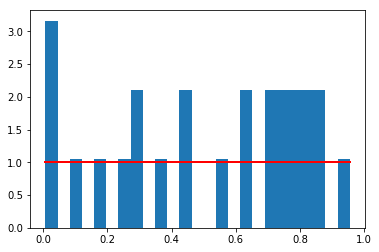

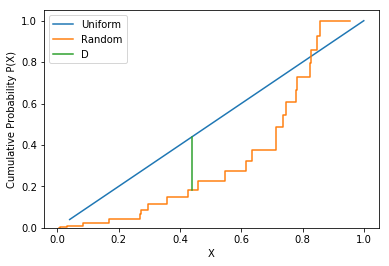

D =  0.256743558783
p-value =  0.061035151844


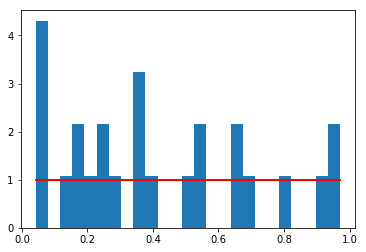

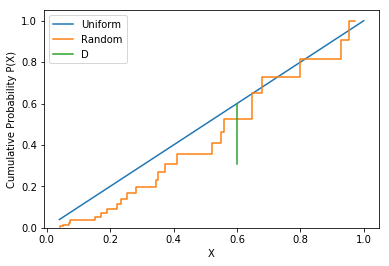

D =  0.292827048994
p-value =  0.021504438614


In [6]:
#probando la funcion Kolmogorov

print("Ingrese el valor de n: ", end="")
n = int(input())
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,515,1,2**35)
colmo(n,u,x)

#Kolmogorov con generador numpy

x = np.random.uniform(0,1,n)
colmo(n,u,x)


Ingrese el valor de n: 65
Valor de chi cuadrado (X^2)  6.846153846153847
Frecuencia Observada  [9, 4, 7, 9, 7, 3, 4, 7, 9, 6]


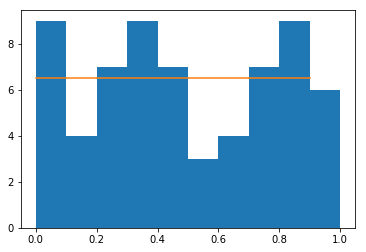

Valor de chi cuadrado (X^2)  2.846153846153846
Frecuencia Observada  [4, 7, 6, 5, 6, 9, 7, 8, 7, 6]


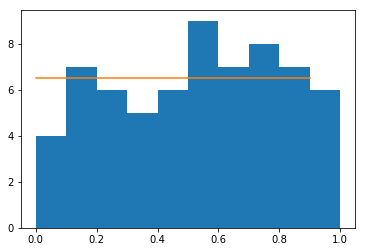

In [7]:
# probando la funcion Chi^2

print("Ingrese el valor de n: ", end="")
c = int(input())
sem=((datetime.now().microsecond/12)*datetime.now().second)
x = val(sem,c,515,1,2**35)
chi(c,x)

# Chi^2 con generador numpy
x = np.random.uniform(0,1,c)
chi(c,x)

Ingrese el valor de n: 72
[11, 6, 6, 9, 8, 4, 7, 3, 9, 9]
La cantidad de rachas es de  66


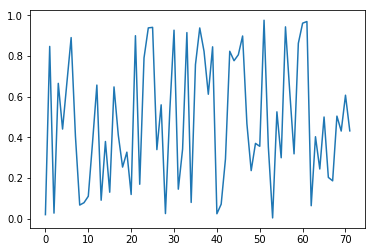

[5, 8, 5, 9, 4, 9, 7, 9, 3, 13]
La cantidad de rachas es de  64


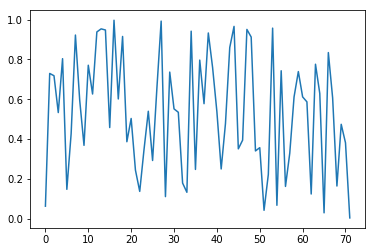

In [8]:
#probando la funcion test de Rachas


print("Ingrese el valor de n: ", end="")
r = int(input())
k=10
sem=((datetime.now().microsecond/12)*datetime.now().second)
x = val(sem,r,515,1,2**35)
rachas(x,k)

#Rachas con generador numpy

x = np.random.uniform(0,1,r)
rachas(x,k)


Pruebas de aleatoriedad datos Randu
Ingrese el valor de n: 100
Kolmogorov


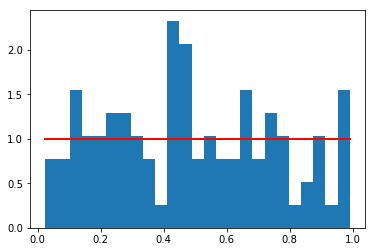

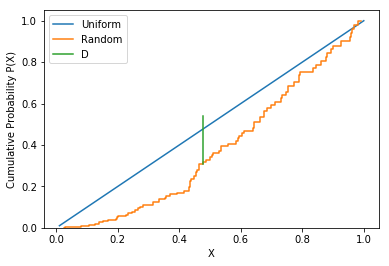

D =  0.230850206194
p-value =  3.61784177616e-05
Chi^2
Valor de chi cuadrado (X^2)  12.0
Frecuencia Observada  [6, 14, 10, 8, 18, 9, 11, 10, 7, 7]


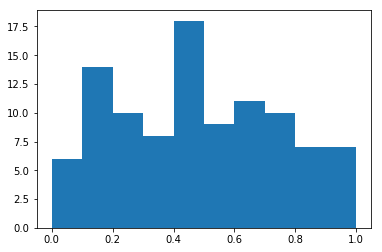

Rachas
[6, 14, 10, 8, 18, 9, 11, 10, 7, 7]
La cantidad de rachas es de  93


In [29]:
##generadores de datos Randu

print("Pruebas de aleatoriedad datos Randu")

#Kolmogorov 


print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,65539,0,2**31)
colmo(n,u,x)

# Chi^2 

print("Chi^2")
chi(c,x)

# Test de Rachas 

print("Rachas")
k=10
rachas(x,k)


Pruebas de aleatoriedad datos Sinclair ZX81
Ingrese el valor de n: 100
Kolmogorov


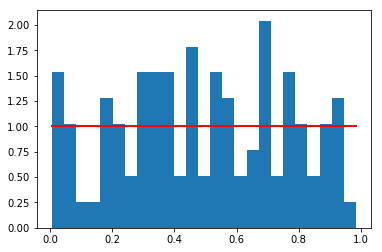

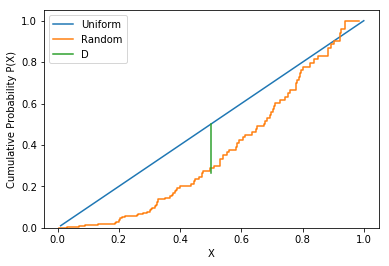

D =  0.233540780019
p-value =  2.79667153527e-05
Chi^2
Valor de chi cuadrado (X^2)  9.400000000000002
Frecuencia Observada  [11, 5, 9, 16, 10, 12, 10, 13, 7, 7]


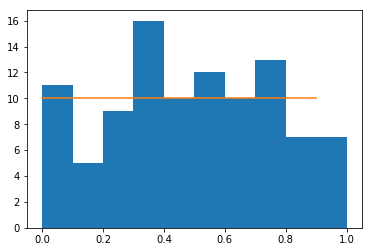

Rachas
[11, 5, 9, 16, 10, 12, 10, 13, 7, 7]
La cantidad de rachas es de  89


In [11]:
 #generadores de datos Sinclair ZX81

print("Pruebas de aleatoriedad datos Sinclair ZX81")

#Kolmogorov c


print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,75,0,(2**16)+1)
colmo(n,u,x)

# Chi^2 

print("Chi^2")
chi(c,x)

# Test de Rachas 

print("Rachas")
k=10
rachas(x,k)


Pruebas de aleatoriedad datos Numerical reciepes
Ingrese el valor de n: 100
Kolmogorov


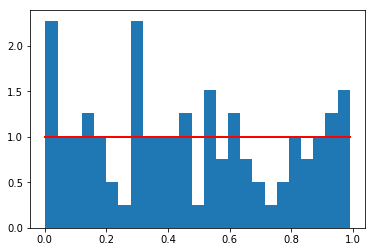

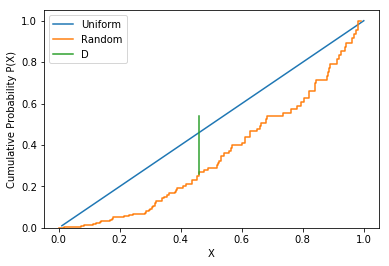

D =  0.281273145825
p-value =  1.72041206836e-07
Chi^2
Valor de chi cuadrado (X^2)  8.2
Frecuencia Observada  [15, 11, 7, 13, 10, 9, 10, 4, 10, 11]


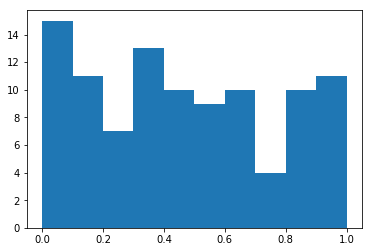

Rachas
[15, 11, 7, 13, 10, 9, 10, 4, 10, 11]
La cantidad de rachas es de  87


In [31]:
#generadores de datos Numerical reciepes


print("Pruebas de aleatoriedad datos Numerical reciepes")

#Kolmogorov

print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,1664525,1013904223,2**32)
colmo(n,u,x)

# Chi^2 

print("Chi^2")
chi(c,x)

#Test de Rachas 

print("Rachas")
k=10
rachas(x,k)

Pruebas de aleatoriedad datos Borland C/C++
Ingrese el valor de n: 100
Kolmogorov


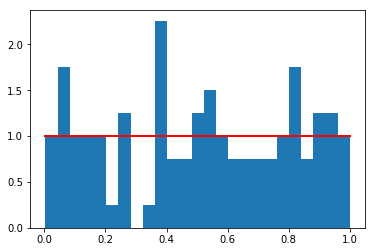

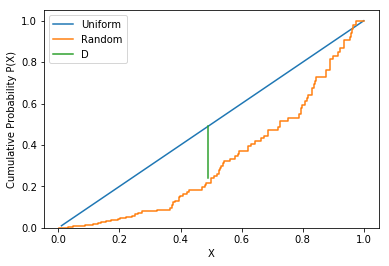

D =  0.251907131386
p-value =  4.43739175249e-06
Chi^2
Valor de chi cuadrado (X^2)  5.0
Frecuencia Observada  [12, 10, 7, 10, 8, 13, 8, 8, 14, 10]


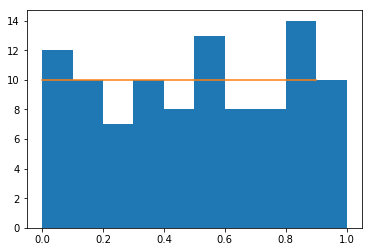

Rachas
[12, 10, 7, 10, 8, 13, 8, 8, 14, 10]
La cantidad de rachas es de  96


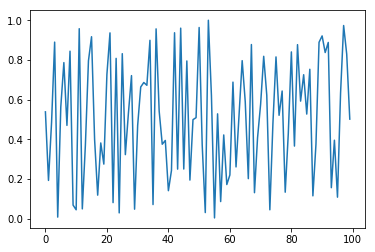

In [17]:

# generadores de datos Borland C/C++
print("Pruebas de aleatoriedad datos Borland C/C++")

#Kolmogorov 


print("Ingrese el valor de n: ", end="")
n = int(input())
print("Kolmogorov")
sem=((datetime.now().microsecond/12)*datetime.now().second)
u = [1.0] * n
x = val(sem,n,22695477,1,2**32)
colmo(n,u,x)

# Chi^2 

print("Chi^2")
chi(c,x)

#Rachas 

print("Rachas")
k=10
rachas(x,k)